# The SIR Model and CORONA

In [0]:
#susceptible
S = [700]
#infected
I = [5]
#recovered
R = [2]

In [2]:
snext = 700 + (-0.01*700*5)
print(snext)

665.0


In [0]:
Inext = 5 + (0.01*700*5 - 1/14*5)

In [4]:
print(Inext)

39.642857142857146


In [5]:
snext = 700 + (-0.0001*700*5)
Inext = 5 + (0.0001*700*5 - 1/14*5)
rnext = 2 + 1/14*5
print(snext, Inext, rnext)

699.65 4.992857142857143 2.357142857142857


In [0]:
#susceptible
S = [700]
#infected
I = [5]
#recovered
R = [2]
for i in range(17):
  snext = S[i] + (-0.001*S[i]*I[i])
  Inext = I[i] + (0.001*S[i]*I[i] - 1/14*I[i])
  rnext = R[i] + 1/14*I[i]
  S.append(snext)
  I.append(Inext)
  R.append(rnext)

In [7]:
S

[700,
 696.5,
 690.8285,
 681.686956789801,
 667.0790371658117,
 644.0605780076107,
 608.5985607863037,
 555.9004859090228,
 481.9088243650933,
 386.6900492529603,
 278.92257154302376,
 176.68265581076184,
 98.48104073233439,
 50.30439471988589,
 25.029899472383892,
 12.719751567860635,
 6.754213218438855,
 3.7724732376766053]

In [8]:
I

[5,
 8.142857142857142,
 13.232724489795917,
 21.429073093580904,
 34.50634463945735,
 55.06006489483985,
 86.58922033794411,
 133.10235090537188,
 197.58670167034626,
 278.6921409488831,
 366.55303716247084,
 442.6105930974134,
 489.1971658117399,
 502.43115712334986,
 491.81771257632687,
 468.99802386825536,
 441.4637033699446,
 412.9123216814251]

In [9]:
R

[2,
 2.357142857142857,
 2.938775510204082,
 3.883970116618076,
 5.4146181947309975,
 7.87935709754938,
 11.812218875752226,
 17.997163185605377,
 27.50447396456051,
 41.61780979815667,
 61.52439129450546,
 87.7067510918248,
 119.32179345592576,
 154.26444815676433,
 190.1523879512893,
 225.28222456388409,
 258.7820834116166,
 290.31520508089835]

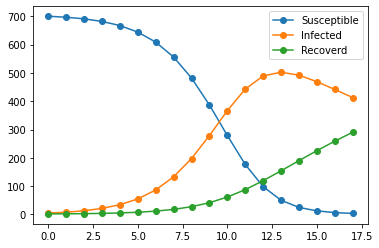

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 

#susceptible
S = [700]
#infected
I = [5]
#recovered
R = [2]
for i in range(17):
  snext = S[i] + (-0.001*S[i]*I[i])
  Inext = I[i] + (0.001*S[i]*I[i] - 1/14*I[i])
  rnext = R[i] + 1/14*I[i]
  S.append(snext)
  I.append(Inext)
  R.append(rnext)
plt.plot(S, '-o', label = 'Susceptible')
plt.plot(I, '-o', label = 'Infected')
plt.plot(R, '-o', label = 'Recoverd')
plt.legend()

In [0]:
from ipywidgets import interact
import ipywidgets as widgets 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [0]:
def sir_experiment(a, b, n):  
  #susceptible
  S = [700]
  #infected
  I = [5]
  #recovered
  R = [2]
  for i in range(n):
    snext = S[i] + (-a*S[i]*I[i])
    Inext = I[i] + (a*S[i]*I[i] - b*I[i])
    rnext = R[i] + b*I[i]
    S.append(snext)
    I.append(Inext)
    R.append(rnext)
  plt.figure(figsize = (14, 5))
  plt.plot(S, '-o', label = 'Susceptible')
  plt.plot(I, '-o', label = 'Infected')
  plt.plot(R, '-o', label = 'Recoverd')
  plt.title(f'SIR Model with parameters \na = {a:.5f} and b = {b:.5f} over {n} periods',
            loc = 'left', fontdict = font )
  plt.legend()

In [29]:
interact(sir_experiment, 
         a = widgets.FloatSlider(0.001, min = 0.000001, max = 0.1, step = 0.0000005),
         b = widgets.FloatSlider(1/14, min = 0.01, max = 0.9, step = 0.05),
         n = widgets.IntSlider(1, min = 1, max = 40, step = 1)
         )

interactive(children=(FloatSlider(value=0.001, description='a', max=0.1, min=1e-06, step=5e-07), FloatSlider(v…

<function __main__.sir_experiment>

### Comparing Real Infected Data

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [0]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3


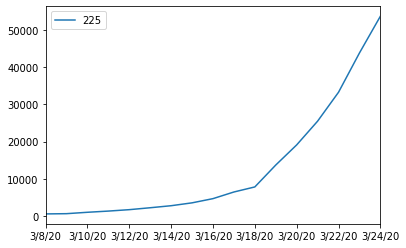

In [0]:
df.loc[df['Country/Region'] == 'US'].T.iloc[50:].plot()